In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
sns.set()

In [15]:
train_data = pd.read_excel('trainingdata_1b.xlsx')
test_data = pd.read_excel('testdata_1c.xlsx')

In [16]:
x_train = train_data.iloc[:,0]
y_train = train_data.iloc[:,1]

In [17]:
x_test = test_data.iloc[:,0]
y_test = test_data.iloc[:,1]

x = np.zeros((len(x_train), 2))
x[:, 0] = 1
x[:, 1] = x_train


In [18]:
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

### question 2a. Implementing locally weighted linear regression

In [19]:
r = 0.22

In [20]:
def loss(y, y_pred, weight):
    lossess = np.mean((y_pred - y) * weight)
    return lossess


In [21]:
def weight_matrix(x0, x, r):
    m = x.shape[0]
    weights = np.mat(np.eye((m)))
    for i in range(m):
        diff = x0 - x[i]
        weights[i,i] = np.exp(diff*diff.T/(-2.0*r**2))
    return weights

In [22]:
def theta(w, x, xi, y):
    a = np.dot(x.T, w)
    b = np.dot(a, x)
    c = np.linalg.inv(b)
    d = np.dot(a, y)
    theta = np.dot(d,c)
    return theta

In [23]:
def lwr(x, xi, y, r):
    y_pred = np.zeros(len(x))
    for i in range(len(x)):
        w = weight_matrix(xi[i], xi, r)
        t = theta(w, x, xi, y)
        y_pred[i] = np.dot(t, x[i])
    return y_pred

### question 2b. plot

In [24]:
y_pred = lwr(x, x_train, y_train, r)

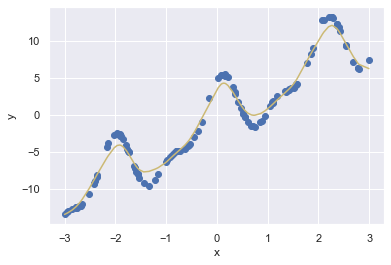

In [25]:
plt.scatter(x_train, y_train)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_pred), key=sort_axis)
x_train, y_pred = zip(*sorted_zip)
plt.plot(x_train, y_pred, color='y')

plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Question 2c Evaluate the locally weighted linear regression on the Test data

In [26]:
test_data = pd.read_excel('testdata_1c.xlsx')
x_test = test_data.iloc[:,0]
y_test = test_data.iloc[:,1]

x_t = np.zeros((len(test_data), 2))
x_t[:, 0] = 1
x_t[:, 1] = x_test

x_test = x_test.values
y_test = y_test.values


In [27]:
y_pred_t = lwr(x_t, x_test, y_test, r)


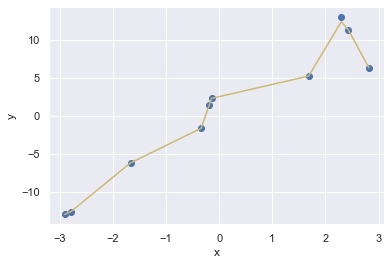

In [28]:
plt.scatter(x_test, y_test)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_test,y_pred_t), key=sort_axis)
x_test, y_pred_t = zip(*sorted_zip)
plt.plot(x_test, y_pred_t, color='y')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Question 2d using only first 20 elements

In [29]:
train_data = pd.read_excel('trainingdata_1b.xlsx')
x_train = train_data.iloc[:,0]
y_train = train_data.iloc[:,1]
x_train_twe = x_train.values[0:20]
y_train_twe = y_train.values[0:20]
print(x_train_twe.shape)

(20,)


In [30]:
x = np.zeros((len(x_train_twe), 2))
x[:, 0] = 1
x[:, 1] = x_train_twe
print(x.shape)

(20, 2)


In [31]:
y_pred_twe = lwr(x, x_train_twe, y_train_twe, r)
print()

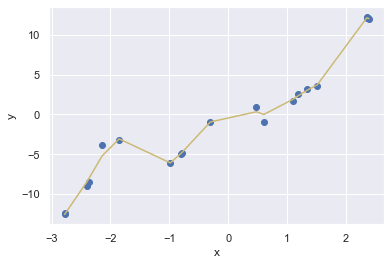

In [32]:
plt.scatter(x_train_twe, y_train_twe)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train_twe,y_pred_twe), key=sort_axis)
x_train_twe, y_pred_twe = zip(*sorted_zip)
plt.plot(x_train_twe, y_pred_twe, color='y')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
test_data = pd.read_excel('testdata_1c.xlsx')
x_test = test_data.iloc[:,0]
y_test = test_data.iloc[:,1]

x_t = np.zeros((len(test_data), 2))
x_t[:, 0] = 1
x_t[:, 1] = x_test

x_test = x_test.values
y_test = y_test.values

In [34]:
y_pred_test = lwr(x_t, x_test, y_test, r)
print()

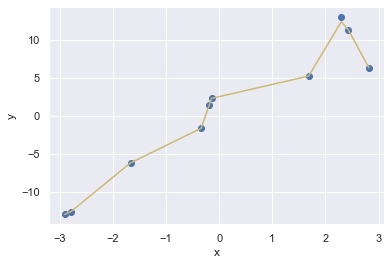

In [35]:
plt.scatter(x_test, y_test)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_test,y_pred_test), key=sort_axis)
x_test, y_pred_test = zip(*sorted_zip)
plt.plot(x_test, y_pred_test, color='y')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

### question 2e. It works same for both the data sets considering we have limited data to come to conclusion